In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# повторяющиеся удалим
duplicate_df = df[df.duplicated]
duplicate_df
df = df.drop_duplicates()
df.shape

(1337, 7)

In [8]:
# обработка null если они есть
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

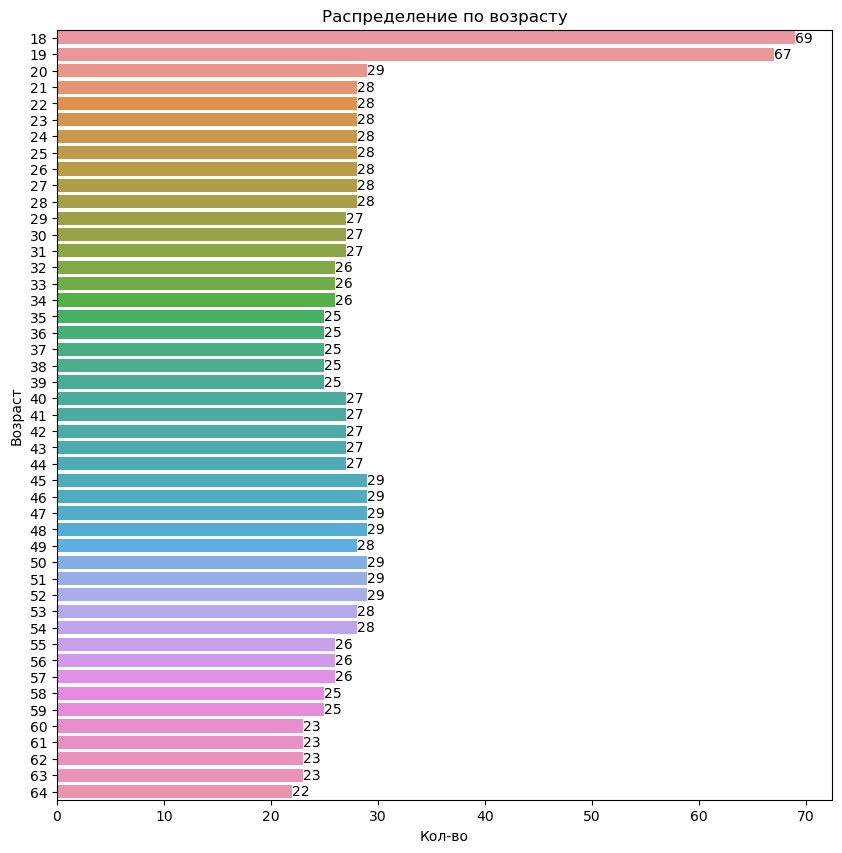

In [9]:
# отобразим данные возраста
plt.figure(figsize=(10,10))
ax = sns.countplot(data= df, y = "age")
plt.xlabel("Кол-во")
plt.ylabel("Возраст")
ax.bar_label(ax.containers[0])
plt.title("Распределение по возрасту")
plt.show()

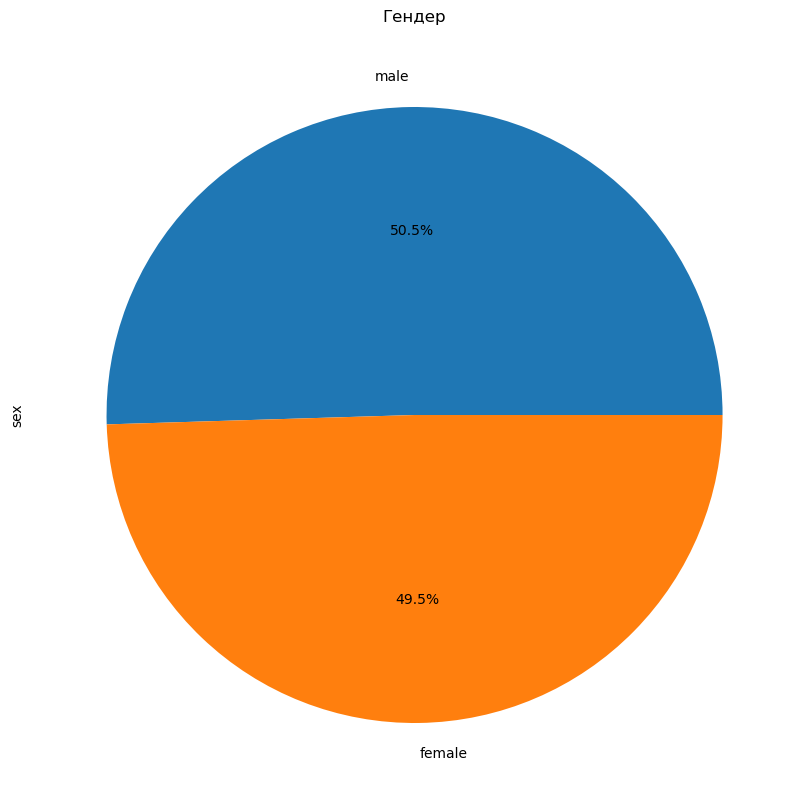

In [10]:
# отобразим по полу
plt.figure(figsize = (10,10))
df['sex'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Гендер')
plt.show()

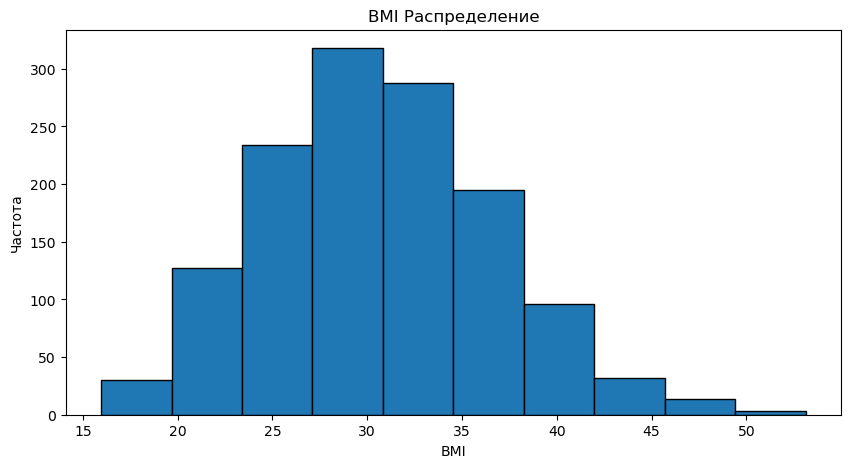

In [11]:
plt.figure(figsize=(10,5))
plt.hist(df['bmi'], edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.title('BMI Распределение')
plt.show()

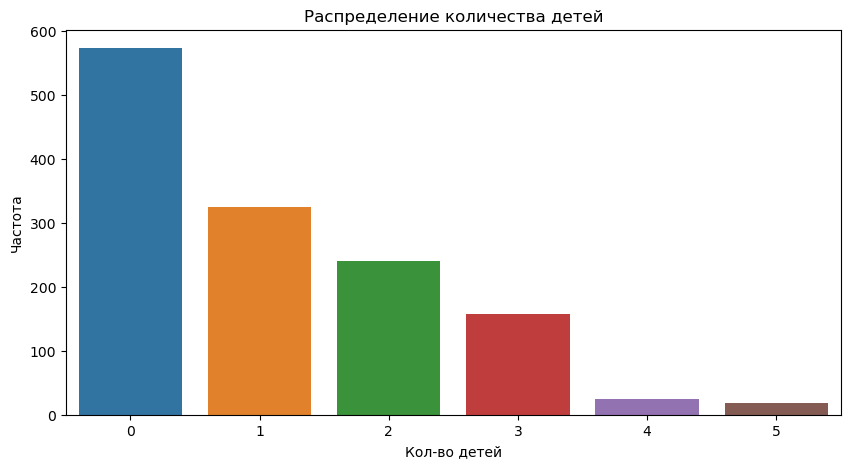

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='children')
plt.xlabel('Кол-во детей')
plt.ylabel('Частота')
plt.title('Распределение количества детей')
plt.show()

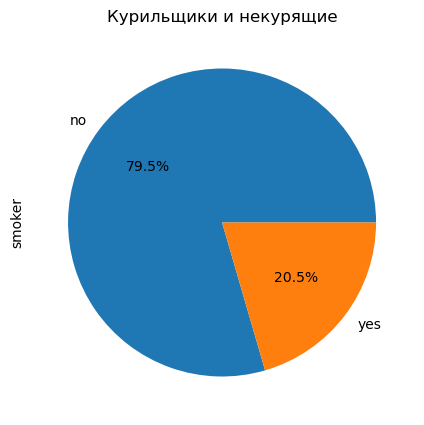

In [13]:
plt.figure(figsize=(5,5))
df['smoker'].value_counts().plot(kind= 'pie', autopct='%1.1f%%')
plt.title('Курильщики и некурящие')
plt.show()

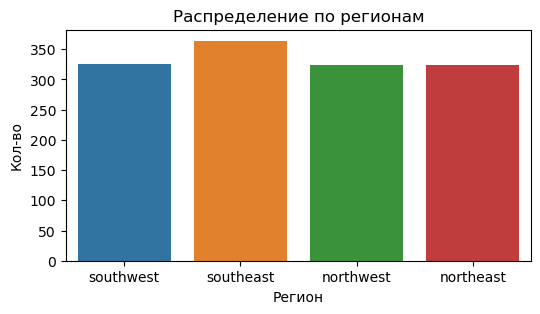

In [14]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='region')
plt.xlabel('Регион')
plt.ylabel('Кол-во')
plt.title('Распределение по регионам')
plt.show()

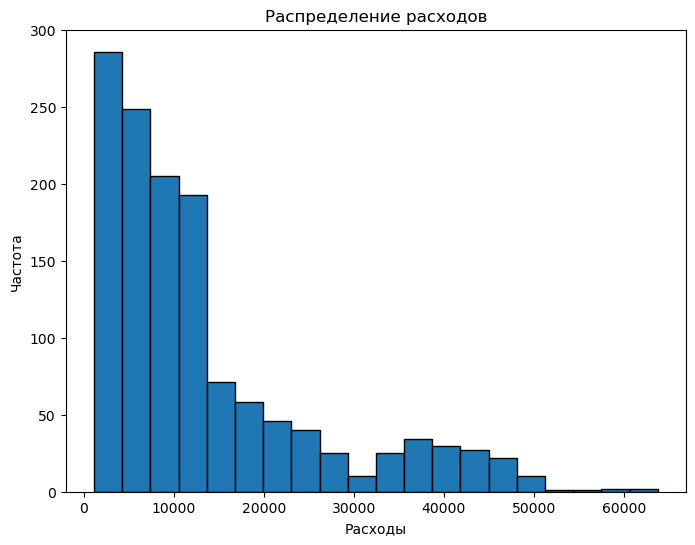

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=20, edgecolor='black')
plt.xlabel('Расходы')
plt.ylabel('Частота')
plt.title('Распределение расходов')
plt.show()

<Axes: title={'center': 'коробка курильщики и их расходы '}, xlabel='charges', ylabel='smoker'>

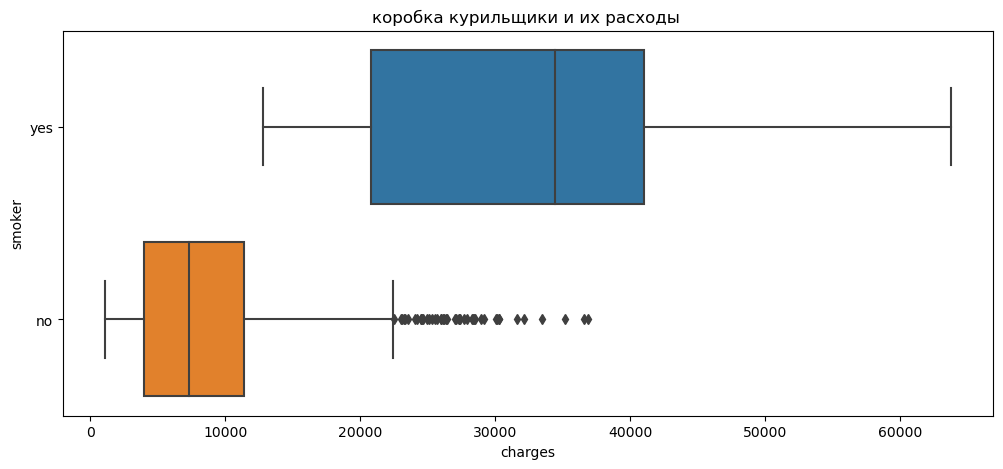

In [16]:
# посмотрим зависимость расходов от курения
plt.figure(figsize=(12,5))
plt.title("коробка курильщики и их расходы ")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

Text(0.5, 1.0, 'График разброса возраста и расходов')

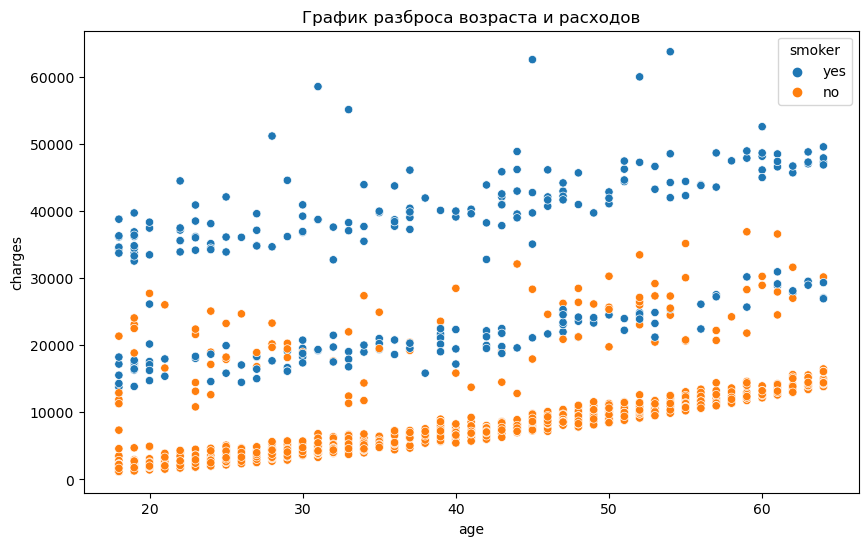

In [17]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=df,hue='smoker')
ax.set_title('График разброса возраста и расходов')

Text(0.5, 1.0, 'График рассеяния bmi  и расходов')

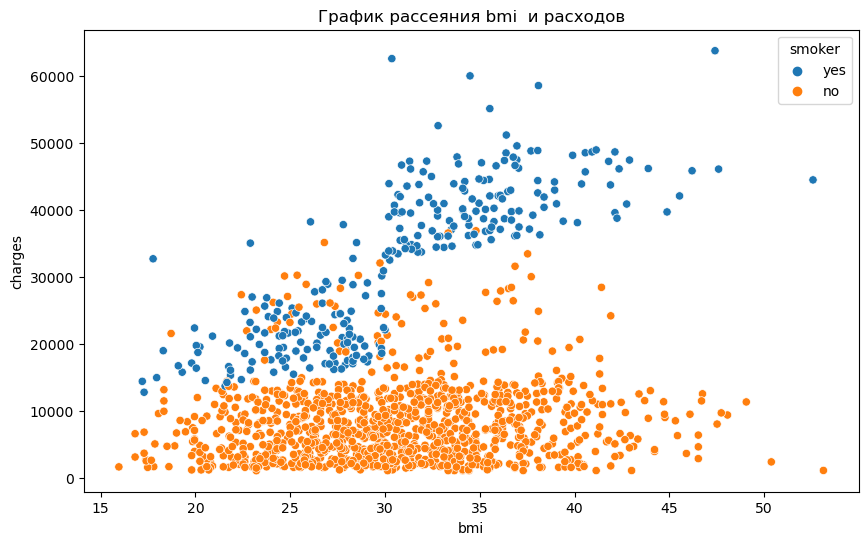

In [18]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('График рассеяния bmi  и расходов')

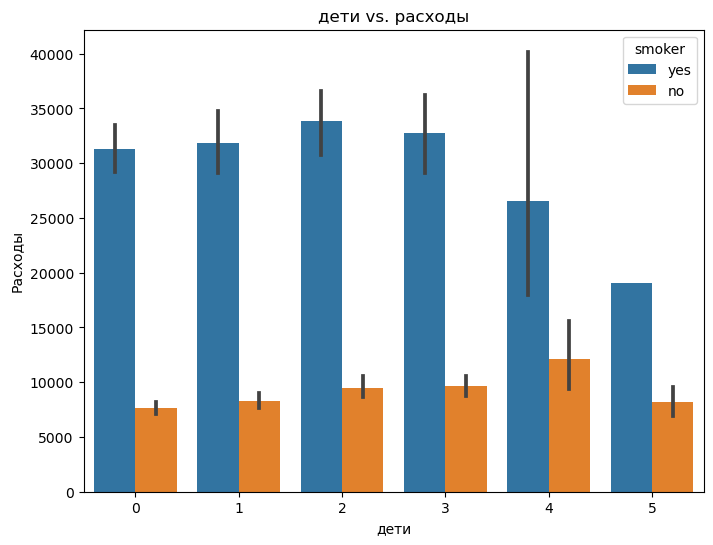

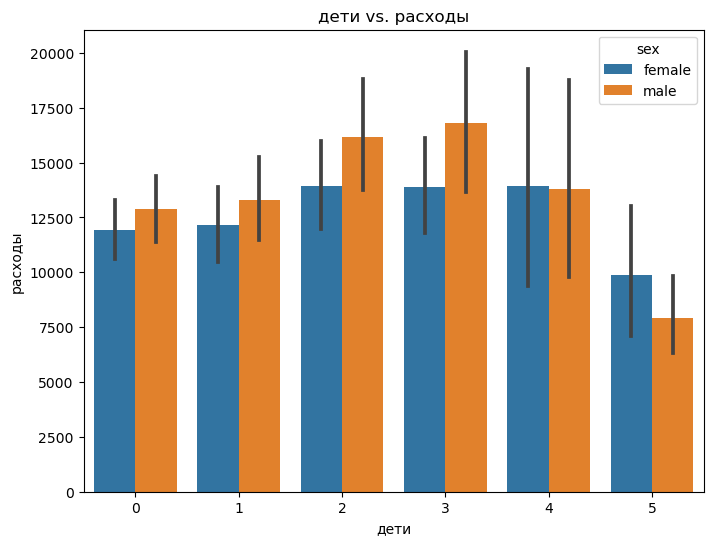

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='smoker')
plt.xlabel('дети')
plt.ylabel('Расходы')
plt.title('дети vs. расходы')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='sex')
plt.xlabel('дети')
plt.ylabel('расходы')
plt.title('дети vs. расходы')
plt.show()

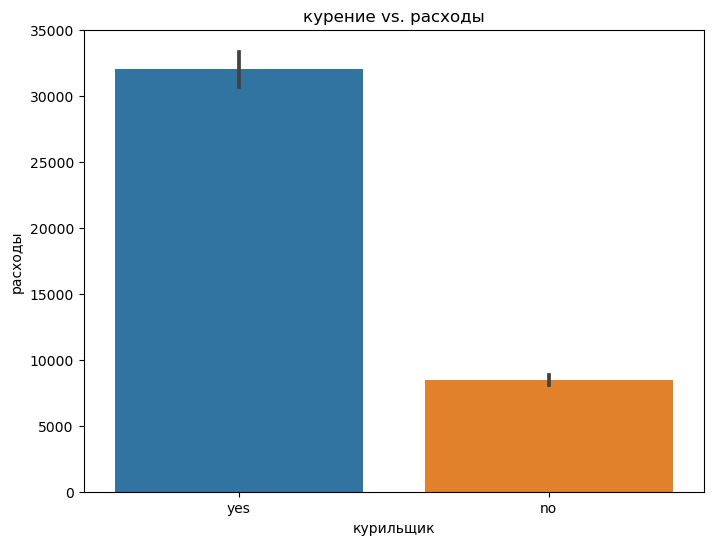

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('курильщик')
plt.ylabel('расходы')
plt.title('курение vs. расходы')
plt.show()

# **Выделим важные критерии**


In [22]:
# преобразуем категориальные признаки
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1

# корреляционная матрица 
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region      0.006547
smoker     -0.787234
Name: charges, dtype: float64

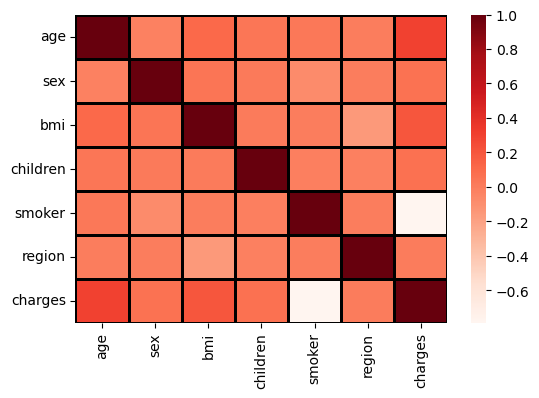

In [23]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

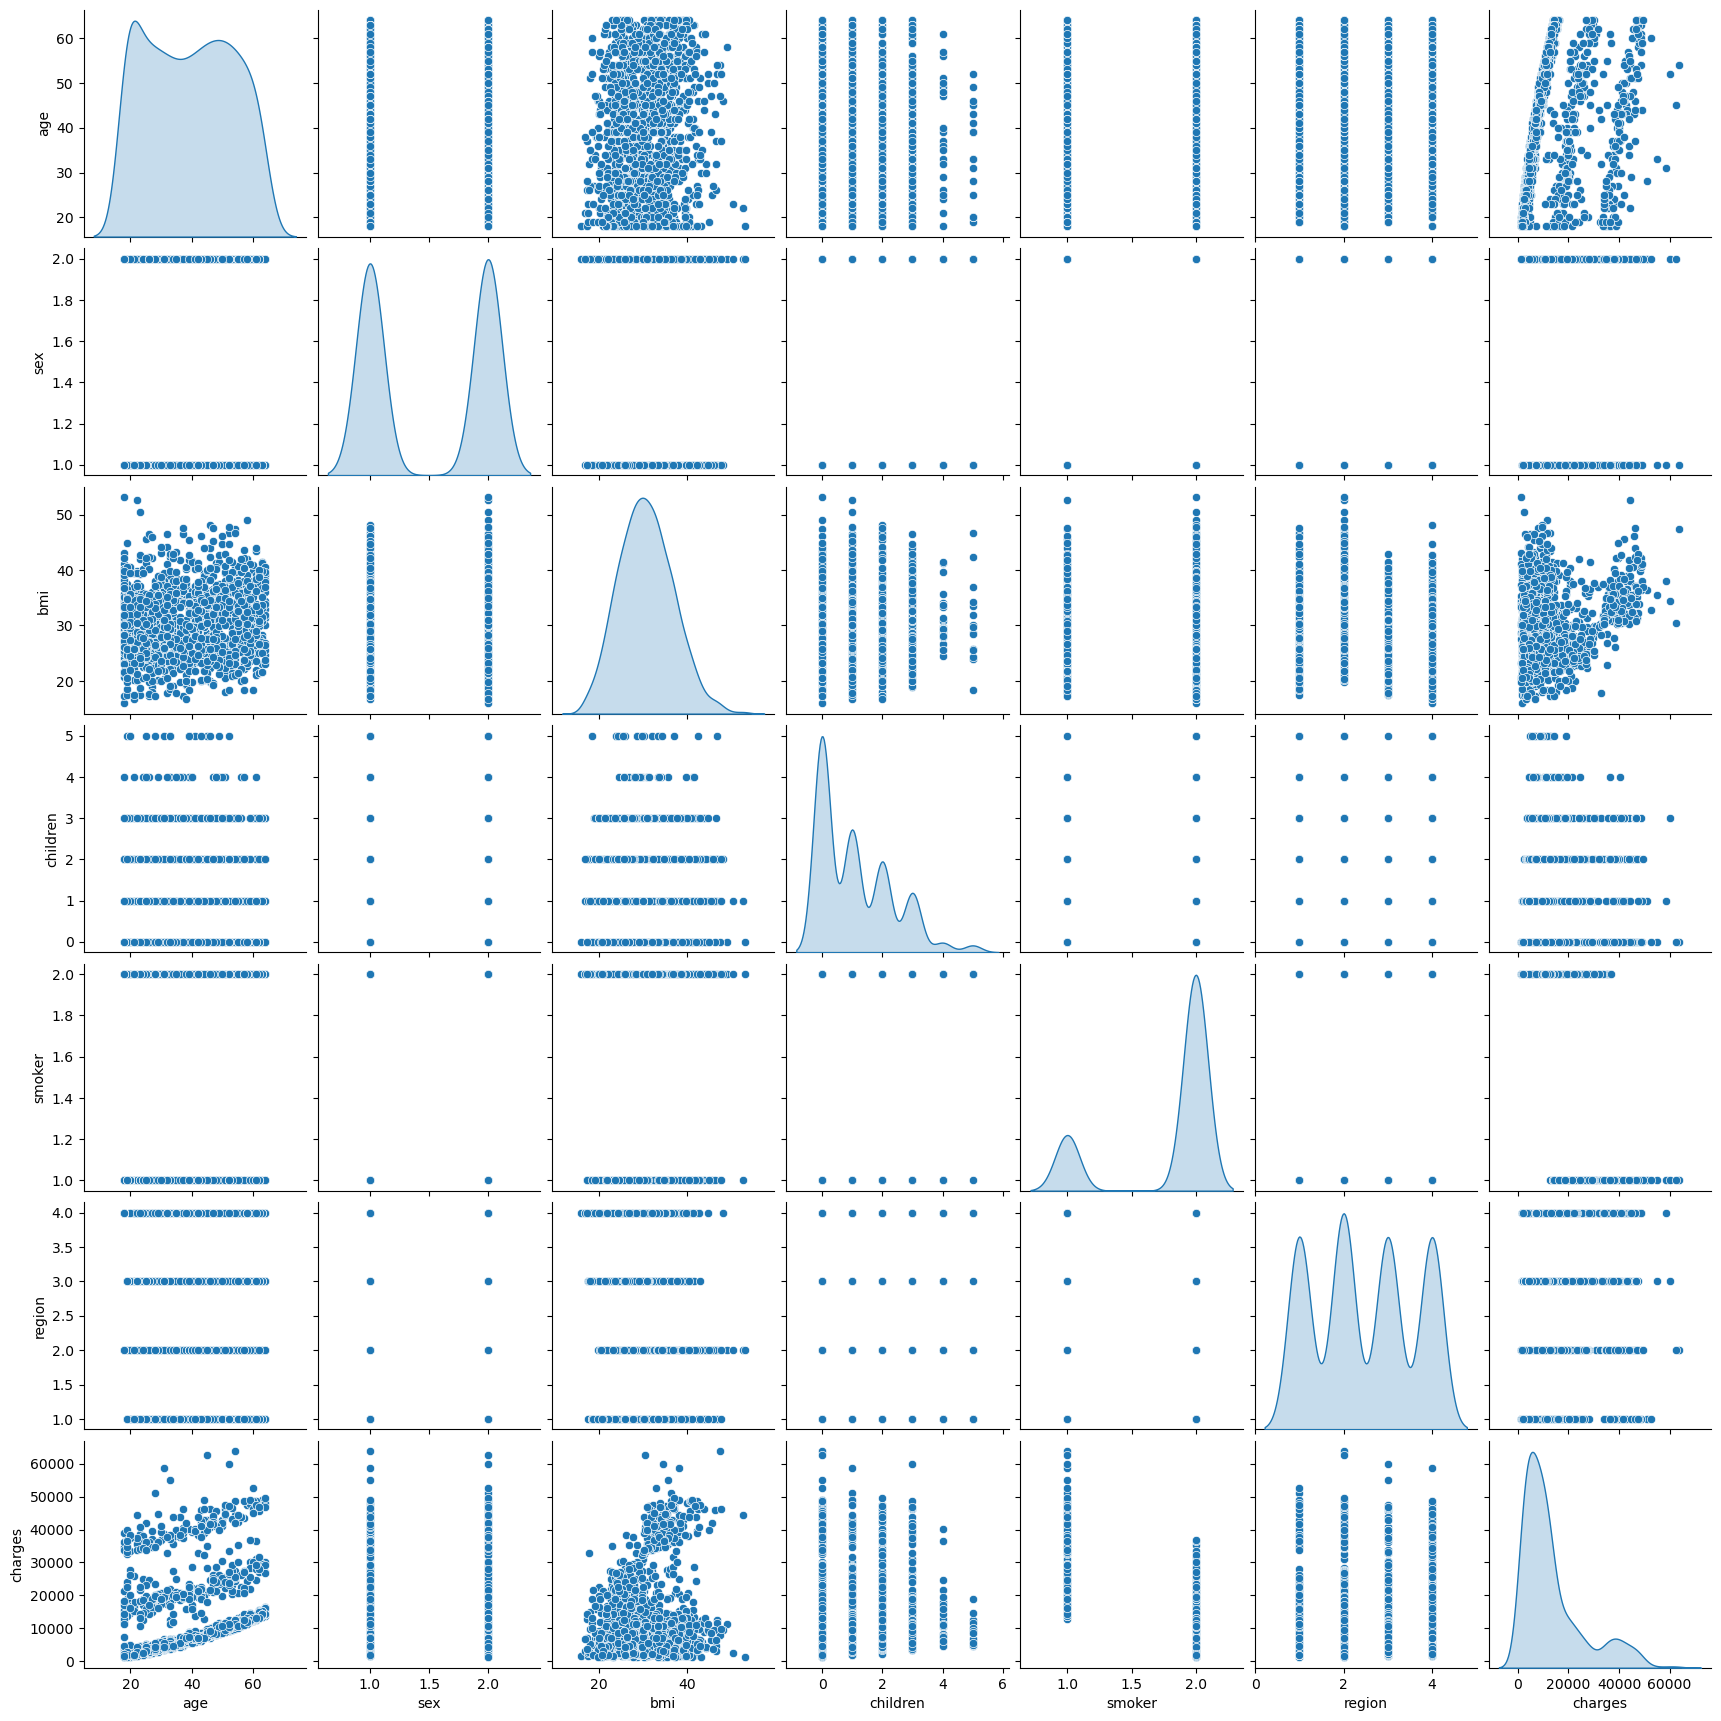

In [25]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');